# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import plotly.express as px
import scipy.stats as stats

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
mental_health_dat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mental_health.csv")
print(mental_health_dat)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biome

# Change Headers/ Clean Data

In [ ]:
#Renames colomn headers
mental_health= mental_health_dat.rename({'Choose your gender': 'Gender', 'What is your course?': 'Major', 
                            'Your current year of Study': 'Year', "What is your CGPA?": "GPA",
                            'Do you have Depression?': "Depression?", "Do you have Anxiety?": "Anxiety?",
                            "Do you have Panic attack?":"Panic Attacks?", 
                            "Did you seek any specialist for a treatment?":"Treatment?"}, axis='columns')

# Convert the value of 'Year' column to upper case
mental_health['Year'] = mental_health['Year'].str.upper()
#Fixes spacing of data set
mental_health.loc[6, 'GPA'] = '3.50 - 4.00'
#Makes new column of depressed with true/ false
mental_health["Num Depressed"] = mental_health["Depression?"] == "Yes"
#print(mental_health)
#Makes new column of anxiety with true/ false
mental_health["Num Anxiety"] = mental_health["Anxiety?"] == "Yes"
print(mental_health)

               Timestamp  Gender   Age               Major    Year  \
0         8/7/2020 12:02  Female  18.0         Engineering  YEAR 1   
1         8/7/2020 12:04    Male  21.0   Islamic education  YEAR 2   
2         8/7/2020 12:05    Male  19.0                 BIT  YEAR 1   
3         8/7/2020 12:06  Female  22.0                Laws  YEAR 3   
4         8/7/2020 12:13    Male  23.0        Mathemathics  YEAR 4   
..                   ...     ...   ...                 ...     ...   
96   13/07/2020 19:56:49  Female  21.0                 BCS  YEAR 1   
97   13/07/2020 21:21:42    Male  18.0         Engineering  YEAR 2   
98   13/07/2020 21:22:56  Female  19.0            Nursing   YEAR 3   
99   13/07/2020 21:23:57  Female  23.0    Pendidikan Islam  YEAR 4   
100  18/07/2020 20:16:21    Male  20.0  Biomedical science  YEAR 2   

             GPA Marital status Depression? Anxiety? Panic Attacks?  \
0    3.00 - 3.49             No         Yes       No            Yes   
1    3.00 - 3.49 

# **Notes about the graphs

We were able to change the order of the hue, however, we were not able to change the order on the x-axis so that all the graphs had the same order (i.e. all graphs having yes then no, rather than the graphs being different. We both of us did extensive reserach and tried several differnt approaches for it but were unsucessful.

# Summarize Data

In [ ]:
mental_health.info()
mental_health.describe()
mental_health.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Major           101 non-null    object 
 4   Year            101 non-null    object 
 5   GPA             101 non-null    object 
 6   Marital status  101 non-null    object 
 7   Depression?     101 non-null    object 
 8   Anxiety?        101 non-null    object 
 9   Panic Attacks?  101 non-null    object 
 10  Treatment?      101 non-null    object 
 11  Num Depressed   101 non-null    bool   
 12  Num Anxiety     101 non-null    bool   
dtypes: bool(2), float64(1), object(10)
memory usage: 9.0+ KB


Index(['Timestamp', 'Gender', 'Age', 'Major', 'Year', 'GPA', 'Marital status',
       'Depression?', 'Anxiety?', 'Panic Attacks?', 'Treatment?',
       'Num Depressed', 'Num Anxiety'],
      dtype='object')

#GPA vs. Class Year / Class Year vs. GPA

<Figure size 720x360 with 0 Axes>

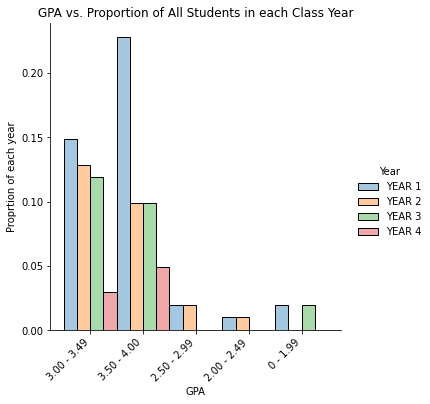

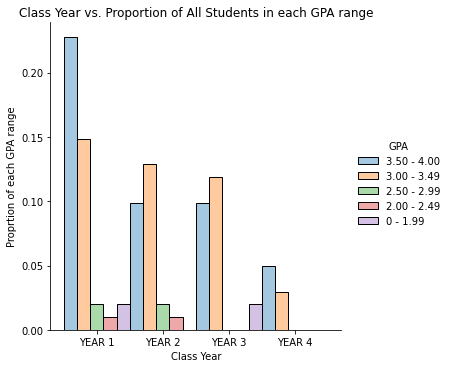

In [ ]:
plt.figure(figsize=(10,5))
plot = sns.displot(data = mental_health, 
                   x="GPA", 
                   hue="Year", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density')#, order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.xlabel("GPA")
plt.ylabel("Proprtion of each year")
plt.title("GPA vs. Proportion of All Students in each Class Year")

sns.displot(data = mental_health, 
                   x="Year", 
                   hue="GPA", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density', hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xlabel("Class Year")
plt.ylabel("Proprtion of each GPA range")
plt.title("Class Year vs. Proportion of All Students in each GPA range")

plt.show()

# Number of depressed people count

In [ ]:
depressed = mental_health["Num Depressed"].value_counts()
print(depressed)
#35 people are depressed

False    66
True     35
Name: Num Depressed, dtype: int64


# Exploring the data: Count of depressed vs. Class Year


Text(0.5, 1.0, 'Number of Depressed Students by Class Year')

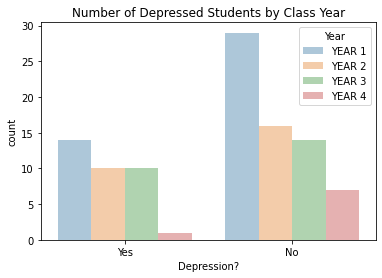

In [ ]:
depcoun = sns.countplot(data=mental_health, x='Depression?', hue = 'Year', alpha = 0.4)
depcoun.set_title("Number of Depressed Students by Class Year")
#When breaking it down by year, it appears that more students in each year is not depressed than depressed

# Exploring the data: Count of depressed vs. GPA


Text(0.5, 1.0, 'Number of Depressed Students by GPA')

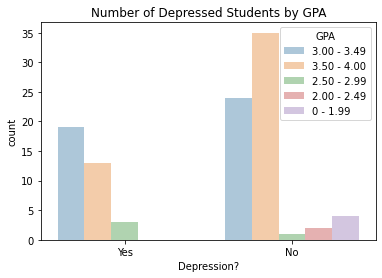

In [ ]:
depcount = sns.countplot(data=mental_health, x='Depression?', hue = 'GPA', alpha = 0.4)
depcount.set_title("Number of Depressed Students by GPA")


# Proportion depression vs. Class year


Year
YEAR 1    0.325581
YEAR 2    0.384615
YEAR 3    0.416667
YEAR 4    0.125000
Name: Num Depressed, dtype: float64


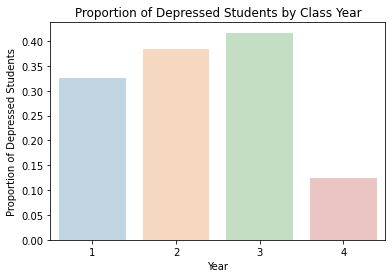

In [ ]:
#Gets the proportion of those who are depressed by class year
depression_proportions = mental_health.groupby("Year")["Num Depressed"].agg('mean')
print(depression_proportions)
year1_depression = depression_proportions[0]
year2_depression = depression_proportions[1]
year3_depression = depression_proportions[2]
year4_depression = depression_proportions[3]
headers = ['depression_proportion']

#Makes a new data from with the proportions
deppropdat = pd.DataFrame({'DepProp': depression_proportions})
deppropdat['Year'] = [1, 2, 3, 4]
deppropdat

depprop = sns.barplot(data=deppropdat, x='Year', y='DepProp', alpha = .3)
depprop.set_title("Proportion of Depressed Students by Class Year")
depprop.set_ylabel("Proportion of Depressed Students")

plt.show()

# Proportion of Depression vs. GPA
Get it so they all have yes, no
Change labels

In [ ]:
#subset data class year
year1 = mental_health[mental_health['Year'] == "YEAR 1"]
year2 = mental_health[mental_health['Year'] == "YEAR 2"]
year3 = mental_health[mental_health['Year'] == "YEAR 3"]
year4 = mental_health[mental_health['Year'] == "YEAR 4"]

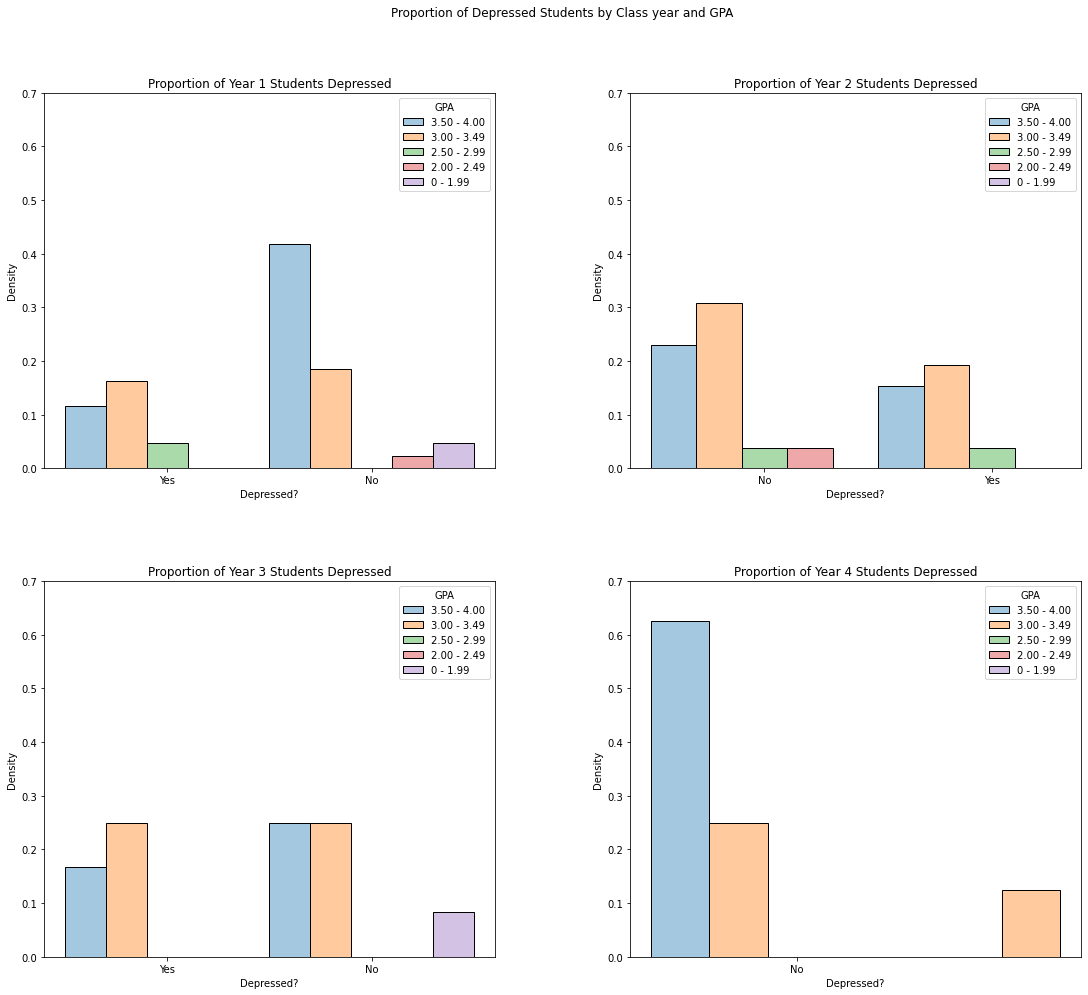

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(18, 15)
fig.suptitle("Proportion of Depressed Students by Class year and GPA")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)

y1 = sns.histplot(data = year1,
                  x="Depression?", 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[0,0])

y1.set_ylim(0, .7)
y1.set_title("Proportion of Year 1 Students Depressed")
y1.set_ylabel("Density")
y1.set_xlabel("Depressed?")

y2 = sns.histplot(data=year2, 
                  x="Depression?", 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, multiple="dodge", 
                  stat = 'density', 
                  ax = axes[0,1])
y2.set_ylim(0, .7)
y2.set_title("Proportion of Year 2 Students Depressed")
y2.set_ylabel("Density")
y2.set_xlabel("Depressed?")

y3 = sns.histplot(data=year3, 
                  x = 'Depression?', 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, multiple="dodge", 
                  stat = 'density', 
                  ax = axes[1,0])
y3.set_ylim(0, .7)
y3.set_title("Proportion of Year 3 Students Depressed")
y3.set_ylabel("Density")
y3.set_xlabel("Depressed?")

y4 = sns.histplot(data=year4, 
                  x = 'Depression?', 
                  hue="GPA", 
                  alpha = .4, 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[1,1])
                  #sort  = False
y4.set_title("Proportion of Year 4 Students Depressed")
y4.set_ylabel("Density")
y4.set_xlabel("Depressed?")
plt.show()

# GPA vs. Class year of depressed people or Class year vs. GPA of depressed people
Change order of X axis

<Figure size 720x360 with 0 Axes>

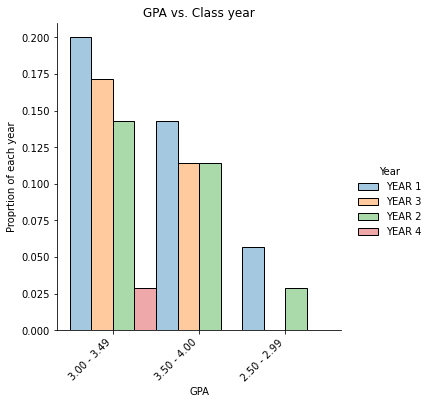

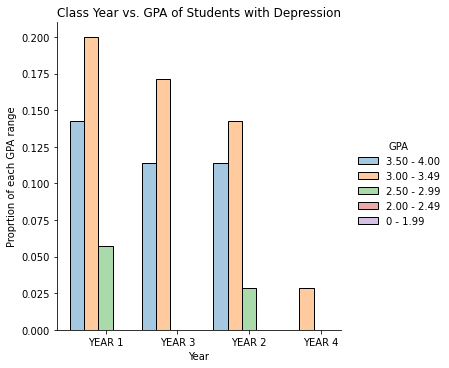

In [ ]:
depressed = mental_health[mental_health["Depression?"] == "Yes"]
#print(depressed)
plt.figure(figsize=(10,5))
plot = sns.displot(data = depressed, 
                   x="GPA", 
                   hue="Year", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density')#, order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.xlabel("GPA")
plt.ylabel("Proprtion of each year")
plt.title("GPA vs. Class year of Students with Depression")

sns.displot(data = depressed, 
                   x="Year", 
                   hue="GPA", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density', hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xlabel("Year")
plt.ylabel("Proprtion of each GPA range")
plt.title("Class Year vs. GPA of Students with Depression")

plt.show()

# Number of people who have anxiety count

In [ ]:
mental_health["Num Anxiety"].value_counts()

False    67
True     34
Name: Num Anxiety, dtype: int64

# Exploring data: Count of anxiety vs. Class year

Text(0.5, 1.0, 'Number of Students with Anxiety by Year')

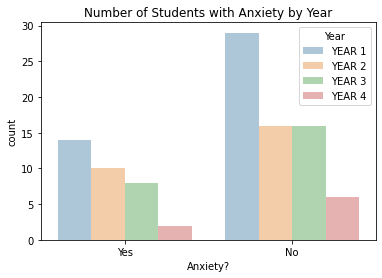

In [ ]:
countanx = sns.countplot(data=mental_health, x='Anxiety?', hue = 'Year', alpha = 0.4, order = ["Yes", "No"])
countanx.set_title("Number of Students with Anxiety by Year")

# Exploring data: Count of anxiety vs. GPA

Text(0.5, 1.0, 'Number of Anxious Students by GPA')

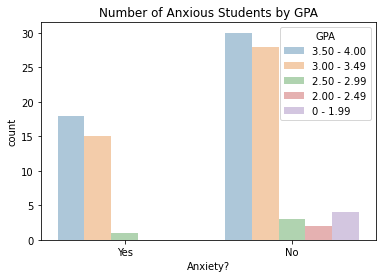

In [ ]:
anxcount = sns.countplot(data=mental_health, 
              x='Anxiety?', 
              hue = 'GPA', 
              alpha = 0.4, 
              order = ["Yes", "No"], 
              hue_order =['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])

anxcount.set_title("Number of Anxious Students by GPA")

# Proportion depression vs. Class year

Year
YEAR 1    0.325581
YEAR 2    0.384615
YEAR 3    0.333333
YEAR 4    0.250000
Name: Num Anxiety, dtype: float64


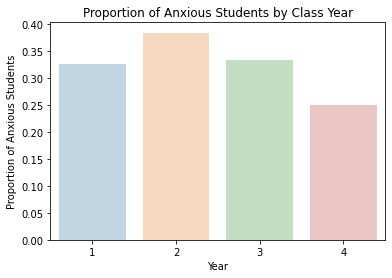

In [ ]:
#sns.histplot(data = mental_health, x = "Year", multiple = "dodge")

anxiety_proportions = mental_health.groupby("Year")["Num Anxiety"].agg('mean')
print(anxiety_proportions)
year1_anxiety = anxiety_proportions[0]
year2_anxiety = anxiety_proportions[1]
year3_anxiety = anxiety_proportions[2]
year4_anxiety = anxiety_proportions[3]
headers = ['anxiety_proportion']

#Makes a new data from with the proportions
anxpropdat = pd.DataFrame({'AnxProp': anxiety_proportions})
anxpropdat['Year'] = [1, 2, 3, 4]
anxpropdat

anxprop = sns.barplot(data=anxpropdat, x='Year', y='AnxProp', alpha = .3)
anxprop.set_title("Proportion of Anxious Students by Class Year")
anxprop.set_ylabel("Proportion of Anxious Students")
plt.show()

# Proportion of Anxiety vs. GPA

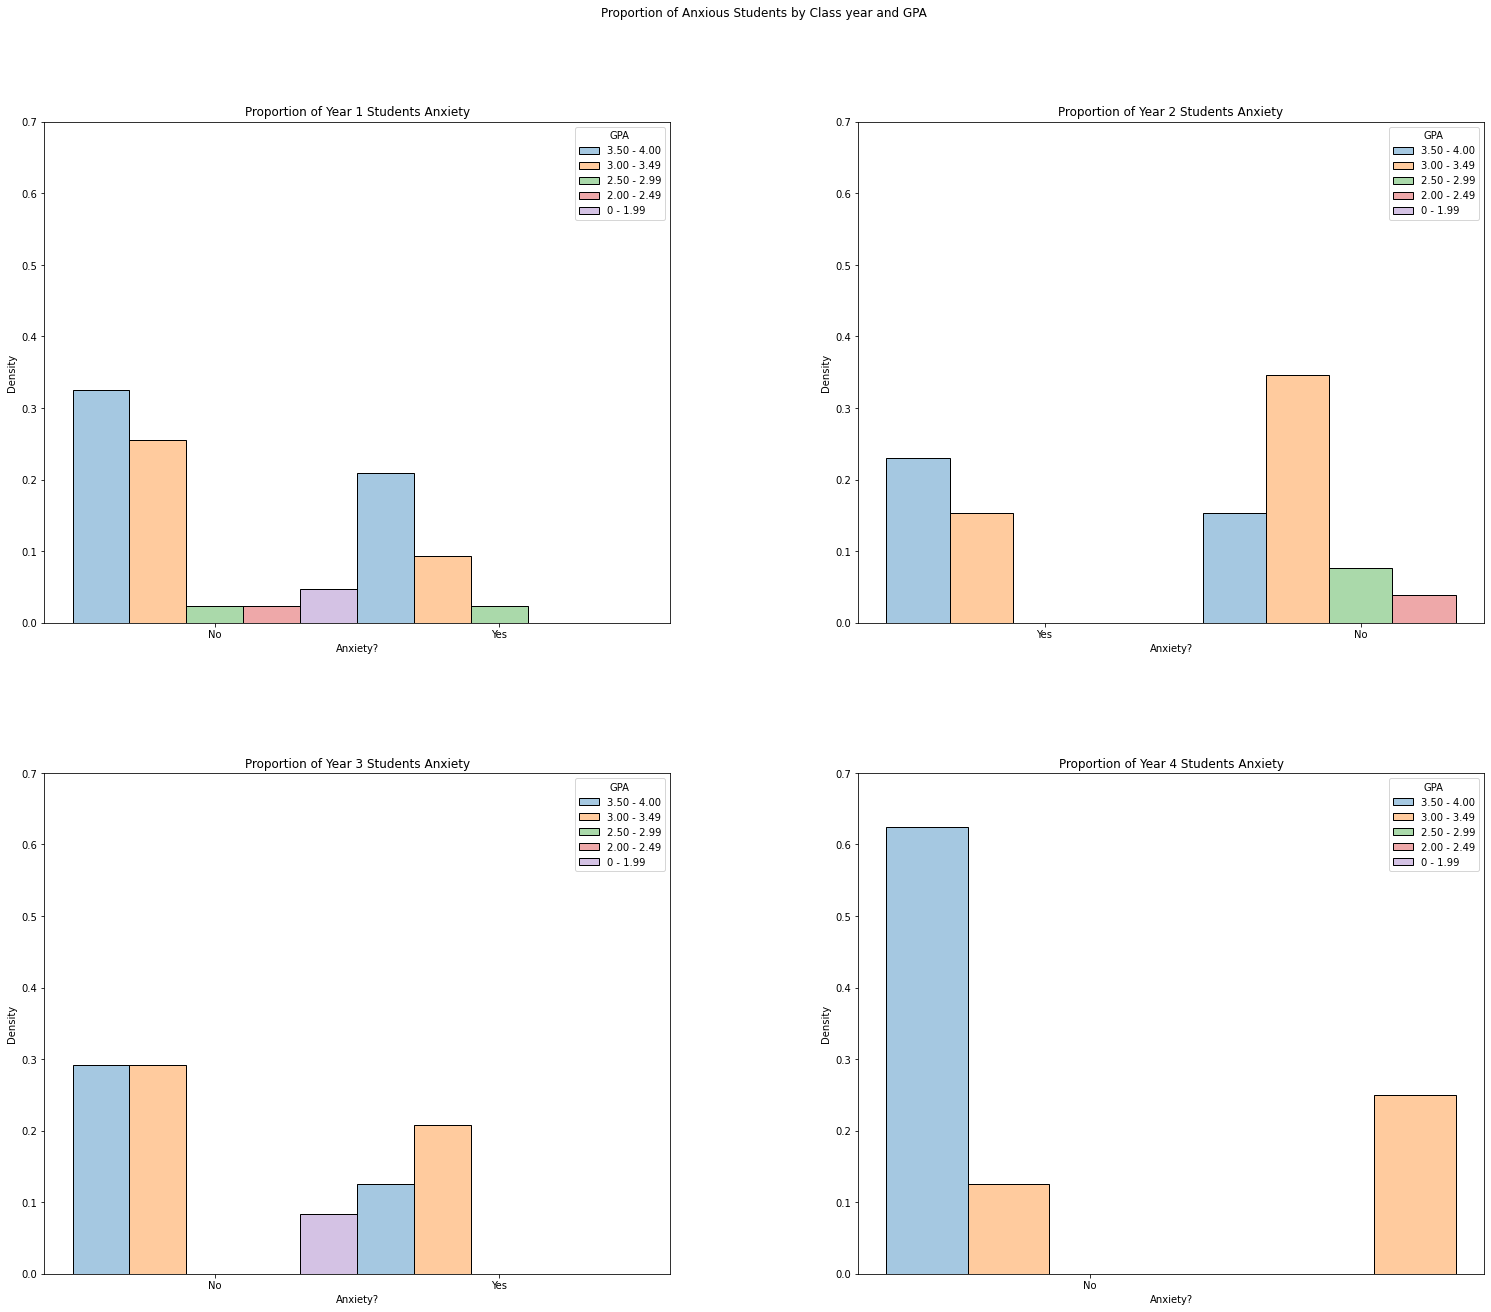

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(25, 20)
fig.suptitle("Proportion of Anxious Students by Class year and GPA")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)

y1 = sns.histplot(data = year1,
                  x="Anxiety?", 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[0,0])

y1.set_ylim(0, .7)
y1.set_title("Proportion of Year 1 Students Anxiety")
y1.set_ylabel("Density")
y1.set_xlabel("Anxiety?")

y2 = sns.histplot(data=year2, 
                  x="Anxiety?", 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[0,1])
y2.set_ylim(0, .7)
y2.set_title("Proportion of Year 2 Students Anxiety")
y2.set_ylabel("Density")
y2.set_xlabel("Anxiety?")

y3 = sns.histplot(data=year3, 
                  x = 'Anxiety?', 
                  hue="GPA", 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  alpha = .4, 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[1,0])
y3.set_ylim(0, .7)
y3.set_title("Proportion of Year 3 Students Anxiety")
y3.set_ylabel("Density")
y3.set_xlabel("Anxiety?")

y4 = sns.histplot(data=year4, 
                  x = 'Anxiety?', 
                  hue="GPA", 
                  alpha = .4, 
                  hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], 
                  multiple="dodge", 
                  stat = 'density', 
                  ax = axes[1,1])
                  #sort  = False
y4.set_title("Proportion of Year 4 Students Anxiety")
y4.set_ylabel("Density")
y4.set_xlabel("Anxiety?")
plt.ylim(0, 0.7)
#plt.xlim(0,0.7)
plt.show()

#  GPA vs. Class year of anxious people or Class year vs. GPA of anxious people

<Figure size 720x360 with 0 Axes>

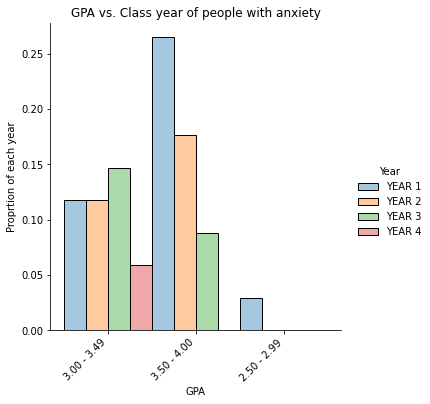

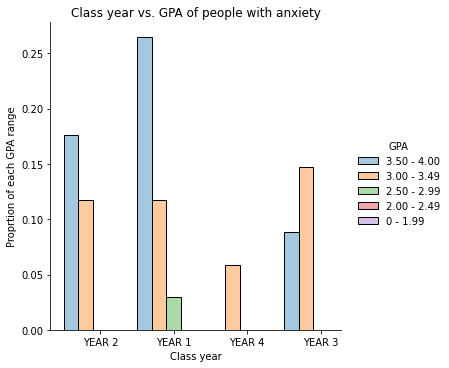

In [ ]:
anxiety = mental_health[mental_health["Anxiety?"] == "Yes"]
#print(depressed)
plt.figure(figsize=(10,5))
plot = sns.displot(data = anxiety, 
                   x="GPA", 
                   hue="Year", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density', hue_order = ['YEAR 1', 'YEAR 2', 'YEAR 3', 'YEAR 4'])
                   #hue_order = ['YEAR 1, YEAR 2, YEAR 3, YEAR4'])#, order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.xlabel("GPA")
plt.ylabel("Proprtion of each year")
plt.title("GPA vs. Class year of people with anxiety")

sns.displot(data = anxiety, 
                   x="Year", 
                   hue="GPA", 
                   alpha = .4, 
                   multiple="dodge", 
                   stat = 'density', hue_order = ['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'])
plt.xlabel("Class year")
plt.ylabel("Proprtion of each GPA range")
plt.title("Class year vs. GPA of people with anxiety")

plt.show()